In [1]:
import sys
COMP_NAME = "icecube-neutrinos-in-deep-ice"
sys.path.append(f"/home/anjum/kaggle/{COMP_NAME}/")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.config import INPUT_PATH, OUTPUT_PATH

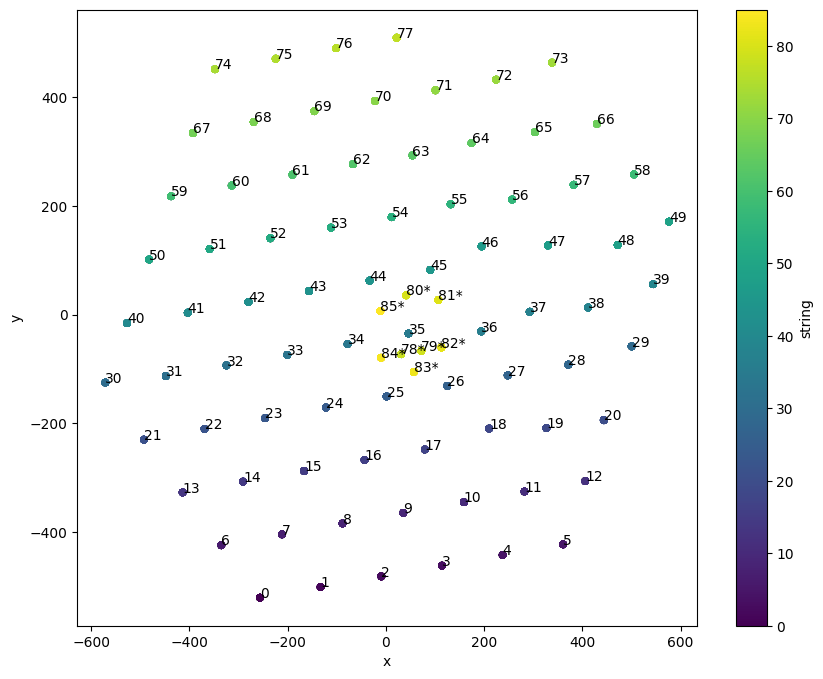

In [2]:
sensors = pd.read_csv(INPUT_PATH / "sensor_geometry.csv")

sensors["string"] = 0
sensors["qe"] = 1

for i in range(len(sensors) // 60):
    start, end = i * 60, (i * 60) + 60
    sensors.loc[start:end, "string"] = i
    
    # High Quantum Efficiency in the lower 50 DOMs - https://arxiv.org/pdf/2209.03042.pdf (Figure 1)
    if i in range(78, 86):
        start_veto, end_veto = i * 60, (i * 60) + 10
        start_core, end_core = end_veto + 1, (i * 60) + 60
        sensors.loc[start_core:end_core, "qe"] = 1.35
        
        
x = sensors[["x", "y", "string"]].plot(kind="scatter", x="x", y="y", c="string", cmap="viridis", figsize=(10, 8));

for index, row in sensors.iterrows():
    if index % 60 == 0:
        s = str(int(row["string"]))
        if row["string"] in range(78, 86):
            s += "*"
        plt.annotate(s, (row["x"], row["y"] + 0.2))
        
# Strings 78-85 are Veto (top 10 DOMs) & DeepCore (bottom 50 DOMs)

In [3]:
def rotz(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1],
    ], dtype="float64")

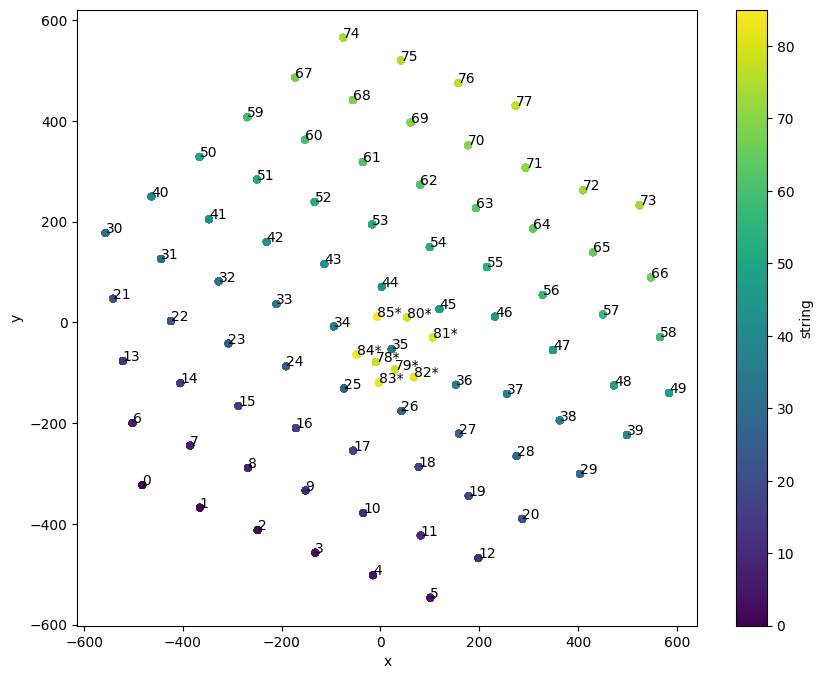

In [12]:
rot_mat = rotz(30 * np.pi / 180)

sensors_rot = sensors.copy()
sensors_rot[["x", "y", "z"]] = np.dot(sensors[["x", "y", "z"]].values, rot_mat)

x = sensors_rot[["x", "y", "string"]].plot(kind="scatter", x="x", y="y", c="string", cmap="viridis", figsize=(10, 8));

for index, row in sensors_rot.iterrows():
    if index % 60 == 0:
        s = str(int(row["string"]))
        if row["string"] in range(78, 86):
            s += "*"
        plt.annotate(s, (row["x"], row["y"] + 0.2))